# <center><b> <em> Exploratory Data Analysis </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [159]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

In [160]:
data.shape

(1033036, 8)

In [161]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [188]:
df_churn_custmer = pd.read_csv("../data/df_churn_custmer.csv")

In [190]:
df_churn_custmer.head()

,customer_id,payed_amount,refund_amount,pourcentage
0,12346.0,77353.96,-77287.10,99.913566
1,12347.0,4921.53,0.00,0.000000
2,12348.0,2019.40,0.00,0.000000
3,12349.0,4428.69,-24.15,0.545308
4,12350.0,334.40,0.00,0.000000


## <font color="green"> || - Numerical Variable Analysis : </font>

In [166]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [167]:
desc_prcnt = df_churn_custmer.sort_values(by="refund_amount", ascending=True)


In [168]:
desc_prcnt.head()

,customer_id,payed_amount,refund_amount,pourcentage
4070,16446.0,168472.50,-168469.60,99.998279
0,12346.0,77353.96,-77287.10,99.913566
3378,15749.0,44534.30,-22998.40,51.641993
584,12931.0,92347.34,-20800.37,22.524060
3654,16029.0,117763.62,-20696.91,17.574961


/tmp/ipykernel_51440/3052568354.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



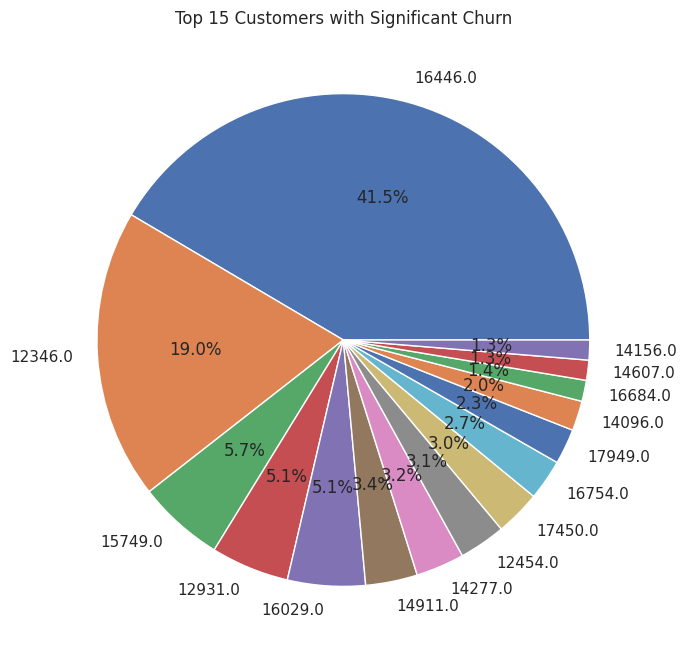

In [189]:
# Sélectionner les clients avec un churn significatif (valeur absolue)
significant_churn = desc_prcnt[desc_prcnt['refund_amount'] < 0]

# Calculer le total des remboursements
total_refunds = significant_churn['refund_amount'].abs().sum()

# Calculer le pourcentage de remboursement pour chaque client
significant_churn['refund_percentage'] = (significant_churn['refund_amount'].abs() / total_refunds) * 100

# Trier les clients par ordre décroissant de pourcentage de remboursement
significant_churn = significant_churn.sort_values('refund_percentage', ascending=False)

# Limiter le nombre de clients affichés dans le graphe
top_n = 15
significant_churn = significant_churn.head(top_n)

# Créer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(significant_churn['refund_percentage'], labels=significant_churn['customer_id'], autopct='%1.1f%%')
plt.title('Top {} Customers with Significant Churn'.format(top_n))
plt.show()

### <font color="green"> ||| - Categorical Variable Analysis : </font>

In [195]:
data = data.dropna()

In [196]:
descr_quant = data.groupby("description").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)

In [197]:
descr_quant.head()

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,103505
WHITE HANGING HEART T-LIGHT HOLDER,88126
ASSORTED COLOUR BIRD ORNAMENT,77755
JUMBO BAG RED RETROSPOT,73033
BROCADE RING PURSE,69343


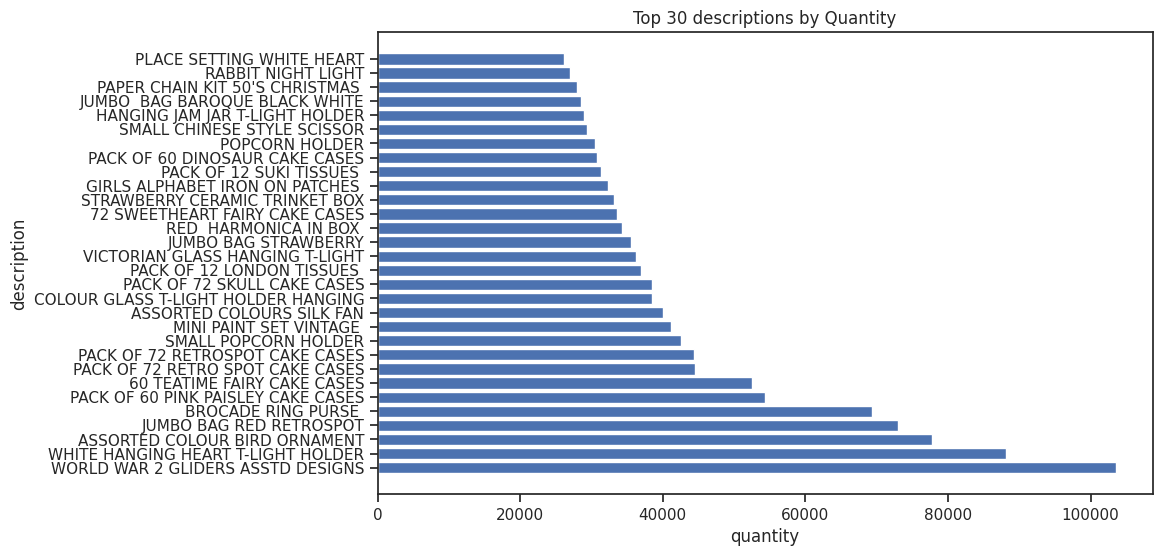

In [198]:
top_n = 30  # Adjust the number of bars to show

top_descriptions = descr_quant.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_descriptions.index, top_descriptions['quantity'])
plt.xlabel('quantity')
plt.ylabel('description')
plt.title('Top {} descriptions by Quantity'.format(top_n))
plt.show()

In [199]:
country_cust_data=data[['country','customer_id']].drop_duplicates()
country_cust_data.groupby(['country'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,country,customer_id
38,United Kingdom,5410
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29
28,Portugal,24
24,Netherlands,23
34,Switzerland,22
33,Sweden,19
18,Italy,17


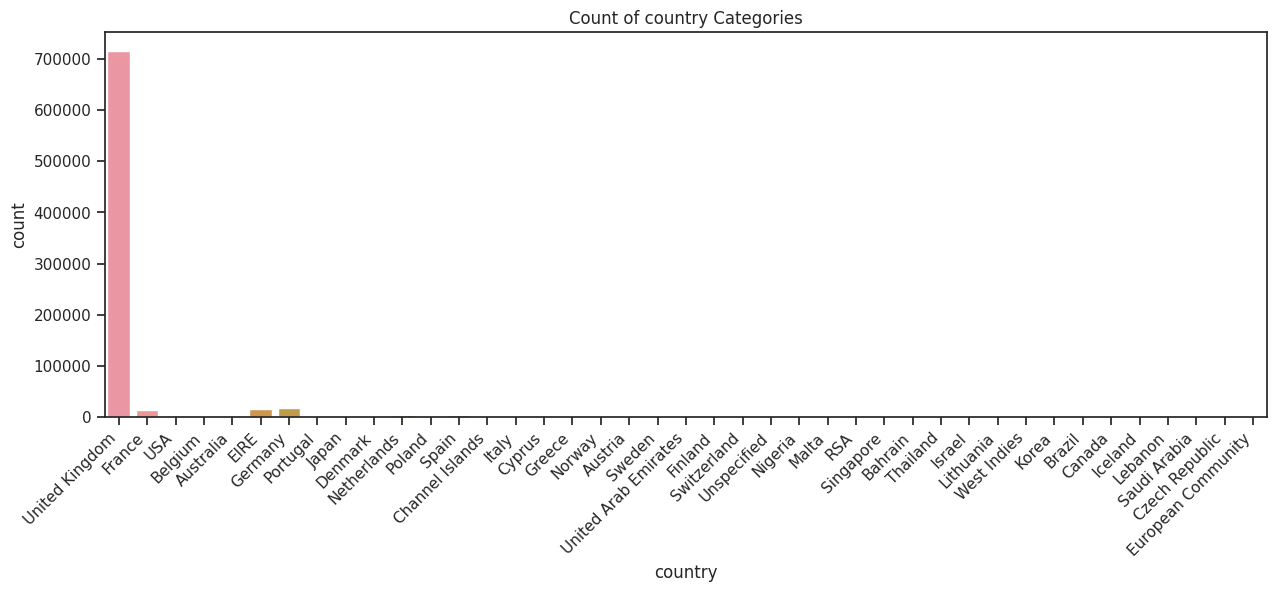

In [200]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation=45, ha='right')
        plt.title(f"Count of {col_name} Categories")
        plt.show()

cat_summary(data, "country", plot=True)

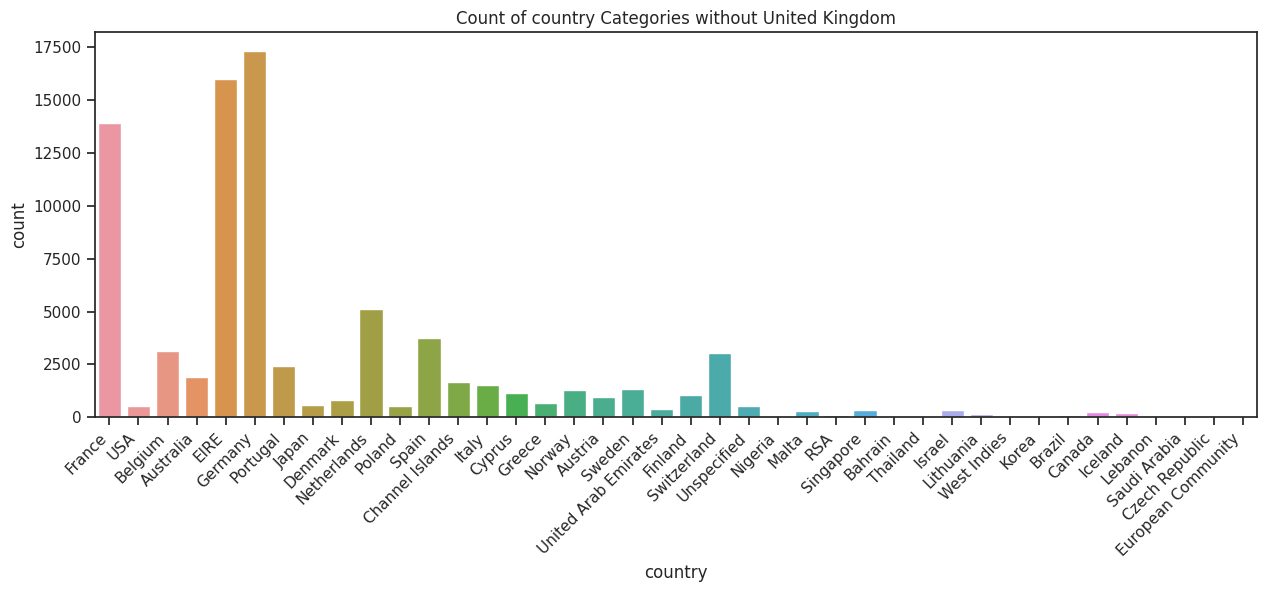

In [201]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        filtered_data = dataframe[dataframe[col_name] != 'United Kingdom']
        sns.countplot(x=col_name, data=filtered_data)
        plt.xticks(rotation=45, ha='right')
        plt.title(f"Count of {col_name} Categories without United Kingdom")
        plt.show()

cat_summary(data, "country", plot=True)

##### <font color="yellow"> Remarques :  </font>

In [207]:
data['month'] = data['invoice_date'].dt.month
data['year'] = data['invoice_date'].dt.year




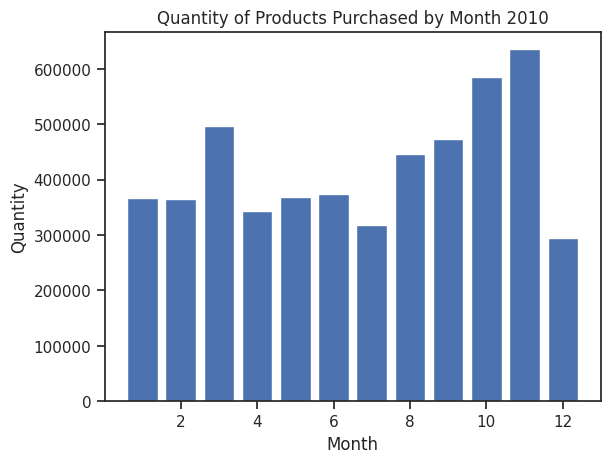

In [209]:
quantity_by_month_2010 = data[data['year'] == 2010].groupby('month')['quantity'].sum()


# Créer l'histogramme
plt.bar(quantity_by_month_2010.index, quantity_by_month_2010.values)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity of Products Purchased by Month in 2010')
plt.show()

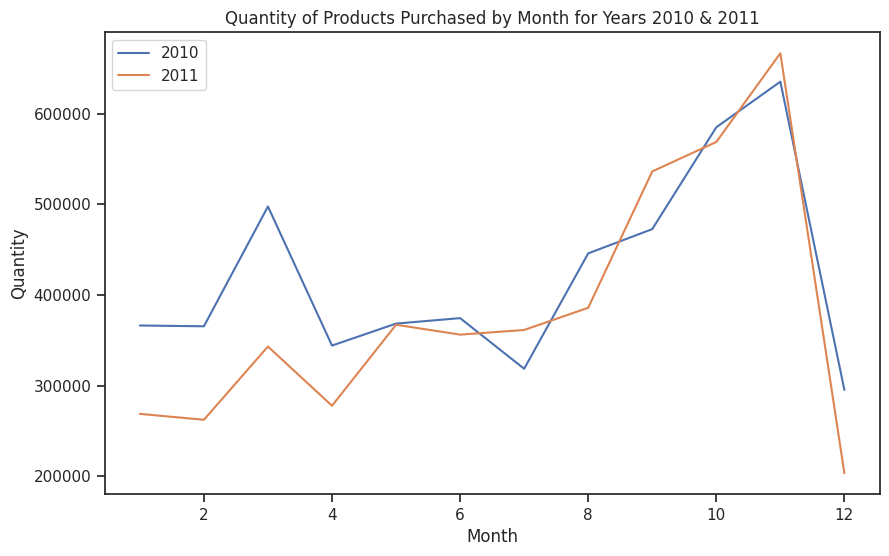

In [213]:
quantity_by_month_2010 = data[data['year'] == 2010].groupby('month')['quantity'].sum()
quantity_by_month_2011 = data[data['year'] == 2011].groupby('month')['quantity'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(quantity_by_month_2010.index, quantity_by_month_2010.values, label='2010')

plt.plot(quantity_by_month_2011.index, quantity_by_month_2011.values, label='2011')

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity of Products Purchased by Month for Years 2010 & 2011')
plt.legend()
plt.show()
